In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import csv
import re
import pickle
import tqdm
from collections import Counter
import random
import os

import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# with open('/content/drive/MyDrive/pandora.pkl', 'rb') as f:
#      pandora = pickle.load(f)


Number of Reddit author profiles: 10295
Number of users with MBTI values: 9067
Number of users with MBTI and gender values: 2684
1568


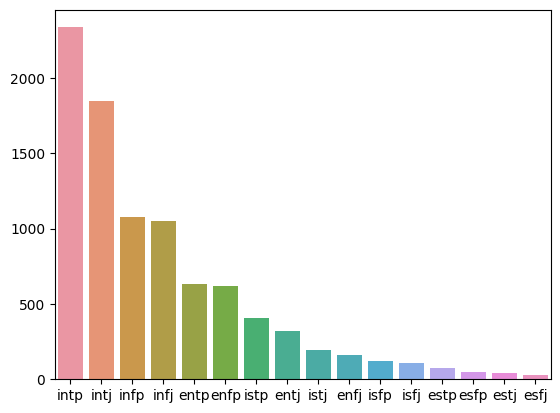

In [ ]:
#Loading Data
user_df = pd.read_csv('/content/drive/MyDrive/author_profiles.csv', usecols = ['author', 'mbti', 'introverted', 'intuitive', 'thinking', 'perceiving',
       'gender', 'age', 'enneagram', 'country', 'state', 'type',
       'agreeableness', 'openness', 'conscientiousness', 'extraversion',
       'neuroticism', 'num_comments', 'en_comments', 'is_female'])

print('Number of Reddit author profiles: '+ str(len(user_df)))
mbti_16 = ['intj', 'intp', 'infp', 'entp', 'istp', 'isfp', 'estj', 'istj', 'estp', 'isfj', 'enfp', 'esfp', 'esfj', 'enfj', 'infj', 'entj']
ocean_5 = ['agreeableness', 'openness', 'conscientiousness', 'extraversion',
       'neuroticism']
#not_mbti=['xntp','xnfp','xnfx','inxj','xsfp','inxx','exxp','xnxj','intx','infx']
mbti_df = user_df[user_df.mbti.isin(mbti_16) == True]
gender_mbti_df = mbti_df.dropna(subset=['is_female'])
mbti = mbti_df['mbti'].value_counts()
print('Number of users with MBTI values: '+str(mbti.sum()))
print('Number of users with MBTI and gender values: '+ str(len(gender_mbti_df)))
sns.barplot(x=mbti.index, y=mbti.values)
ocean_df = user_df.dropna(subset=['agreeableness', 'openness', 'conscientiousness', 'extraversion',
       'neuroticism'])
mbti_df = user_df.drop
print(len(ocean_df))

def get_user_mbti():
    user = list(mbti_df['author'])
    label = list(mbti_df['mbti'])
    user_dict_mbti = {}
    for i,t in enumerate(label):
      user_dict_mbti['author'] = user[i]
      user_dict_mbti['mbti'] = label[i]
    return user_dict_mbti

def get_user_mbti_gender():
    user = list(gender_mbti_df['author'])
    label = list(gender_mbti_df['mbti'])
    gender_label = list(gender_mbti_df['is_female'])
    user_dict_mbti_gender = {'author':[], 'mbti':[], 'gender_label':[]}
    for i,t in enumerate(label):
      user_dict_mbti_gender['author'].append(user[i])
      user_dict_mbti_gender['mbti'].append(label[i])
      user_dict_mbti_gender['gender_label'].append(gender_label[i])
    return user_dict_mbti_gender

def get_user_ocean(ocean_type):
    user = list(ocean_df['author'])
    label = list(ocean_df[ocean_type])
    user_dict = {}
    for i,t in enumerate(user):
            user_dict[user[i]]= label[i]
    return user_dict


user_dict_mbti_gender = get_user_mbti_gender()
user_dict_agreeablness = get_user_ocean('agreeableness')
user_dict_openness = get_user_ocean('openness')
user_dict_conscientiousness = get_user_ocean('conscientiousness')
user_dict_extraversion = get_user_ocean('extraversion')
user_dict_neuroticism = get_user_ocean('neuroticism')




In [ ]:
print(user_dict_mbti_gender['gender_label'][0])

0.0


In [ ]:
subreddits_df = pd.read_csv('/content/drive/MyDrive/subreddits_mbti.csv', names =['start','subreddit'])
subreddits_df['number'] =0
subreddits_df['number'] .iloc[0] = subreddits_df['start'].iloc[0]
subreddits_df['number'].iloc[1:]=subreddits_df['start'].shift(-1).iloc[1:]- subreddits_df['start'].iloc[1:]
subreddits_df.head()
subreddits_df.drop('start', axis=1)

<ipython-input-3-f5dfe726ea8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddits_df['number'] .iloc[0] = subreddits_df['start'].iloc[0]
<ipython-input-3-f5dfe726ea8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddits_df['number'].iloc[1:]=subreddits_df['start'].shift(-1).iloc[1:]- subreddits_df['start'].iloc[1:]


,subreddit,number
0,entp,5.0
1,mbti,2.0
2,shittyMBTI,45.0
3,intj,23.0
4,ENFP,5.0
...,...,...
97,INTPhad,40071.0
98,infj_,44934.0
99,INTP5w4,26968.0
100,INFP_Success,4030.0


Number of sub-reddits: 102


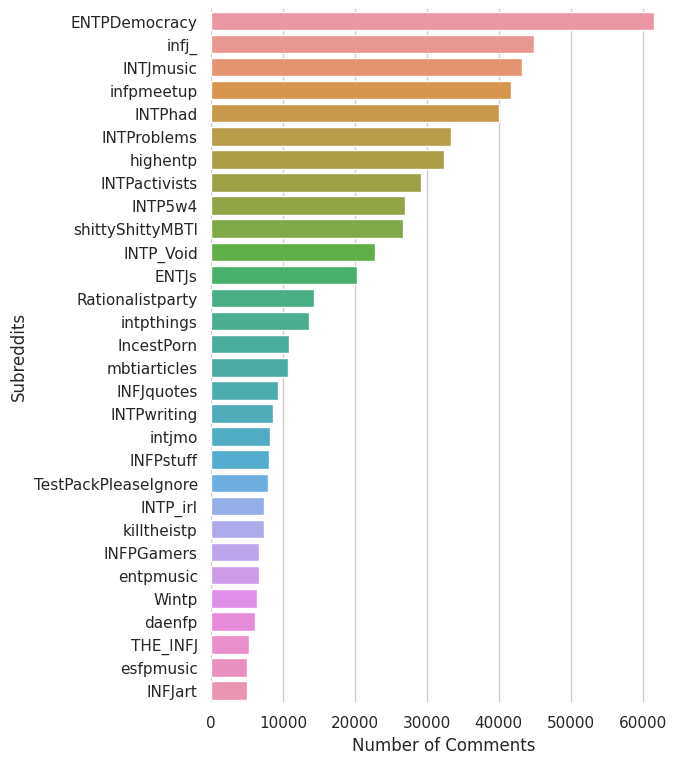

In [ ]:
import matplotlib.pyplot as plt
print("Number of sub-reddits: " + str(len(subreddits_df)))


sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 9))

# Load the example car crash dataset

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(x='number', y='subreddit', data=subreddits_df.nlargest(30, 'number'),orient='h', width=0.8)

# Plot the crashes where alcohol was involved


# Add a legend and informative axis label
ax.set(xlabel="Number of Comments", ylabel= "Subreddits")
sns.despine(left=True, bottom=True)

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/all_comments_since_2015.csv')
#user = list(data['author'])
#text = list(data['body'])
#a = []
#while 1:
#    a.append("1")
userlist =[]
textlist=[]
total_num_comments = 0
num_chunk = 0
def process_chunk(chunk, i):
    userlist.append(list(chunk['author']))
    textlist.append(list(chunk['body']))
    return len(chunk)
    # do something useful ...

chunksize = 10**6
for chunk in pd.read_csv('/content/drive/MyDrive/all_comments_since_2015.csv', chunksize=chunksize):
  process_chunk(chunk, num_chunk)
  total_num_comments = total_num_comments +len(chunk)
  num_chunk = num_chunk+1




In [ ]:
users =[]
for user in userlist:
  users.extend(user)
comments =[]
for text in textlist:
  comments.extend(text)
print(len(user_dict_mbti))
print(len(comments))
print(type(user_dict_openness.keys()))
print(user_dict_openness['-BigSexy-'])


9067
17640062
<class 'dict_keys'>
92.0


In [ ]:
# For subset of data
users =[]

users.extend(userlist[0])
print(users[0])
comments =[]
comments.extend(textlist[0])
print(len(comments))


MetricExpansion
1000000


In [ ]:
#36 minutes to run completely
def find_all_MBTIs(post, mbti):
    return [(match.start(), match.end()) for match in re.finditer(mbti, post)]
reg_link = re.compile('http\S+', flags=re.MULTILINE)
token = ''  # '' or '<mask>'
posts = {'annotations':[], 'posts_text':[], 'posts_num':[], 'max_len':[], 'users':[], 'gender':[]}
for i,t in enumerate(users):
    if t in user_dict_mbti_gender['author']:
        if t not in posts['users']: # new user
            index = user_dict_mbti_gender['author'].index(t)
            posts['users'].append(t)
            posts['posts_text'].append([])
            posts['annotations'].append(user_dict_mbti_gender['mbti'][index].upper())
            posts['max_len'].append(0)
            posts['posts_num'].append(0)
            posts['gender'].append(user_dict_mbti_gender['gender_label'][index])
        user_id = posts['users'].index(t)

        filter_text = reg_link.sub('', comments[i])
        if filter_text != '':
            for mbti in mbti_16:
                mbti_idx_list = find_all_MBTIs(filter_text.lower(), mbti.lower())
                delete_idx = 0
                for start, end in mbti_idx_list:
                    filter_text = filter_text[:start - delete_idx] + token + filter_text[end - delete_idx:]
                    delete_idx += end - start + len(token)
            post_len = len(filter_text.split(' '))
            posts['posts_text'][user_id].append(filter_text)
            if posts['max_len'][user_id] < post_len:
                posts['max_len'][user_id] = post_len
            posts['posts_num'][user_id] += 1


label_lookup = {'E': 0, 'I': 1, 'S': 0, 'N':1, 'T': 0, 'F': 1, 'J': 0, 'P':1}
types = posts['annotations']

In [ ]:

with open('pandora_gender.pkl', 'wb') as f:
    pickle.dump(posts, f)

In [ ]:
aggregated_posts_text =[]
posts_text = posts['posts_text']
for i in range(len(posts_text)):
  aggregated_posts_text.append(' '.join(posts_text[i]))

In [ ]:

# with open('/content/drive/MyDrive/pandora.pkl', 'rb') as f:
#     pandora = pickle.load(f)
annotations = posts['annotations']
posts_text = posts['posts_text']
posts_num =  posts['posts_num']
gender = posts['gender']
user_num = len(annotations)
user_ids = list(range(user_num))
random.shuffle(user_ids)

train_ids, test_ids = user_ids[:int(0.8 * user_num)], user_ids[int(0.8 * user_num):]
train_text, train_num, train_annotations, train_gender = [aggregated_posts_text[i] for i in train_ids],[posts_num[i] for i in train_ids],[annotations[i] for i in train_ids], [gender[i] for i in train_ids]
test_text, test_num, test_annotations, test_gender = [aggregated_posts_text[i] for i in test_ids],[posts_num[i]for i in test_ids],[annotations[i] for i in test_ids], [gender[i] for i in test_ids]

In [ ]:
result_path = "/content/drive/MyDrive"
def save_data(posts_text, posts_num, annotations, gender, result_path, option):
    with open(os.path.join(result_path, option + '.pkl'), 'wb') as f:
        data = {'posts_text':posts_text, 'posts_num':posts_num, 'annotations':annotations, 'gender': gender}
        pickle.dump(data, f)

save_data(train_text, train_num, train_annotations, train_gender, result_path, 'train_new_gender')
save_data(test_text, test_num, test_annotations, test_gender, result_path, 'test_new_gender')

9067
9067
1
9067


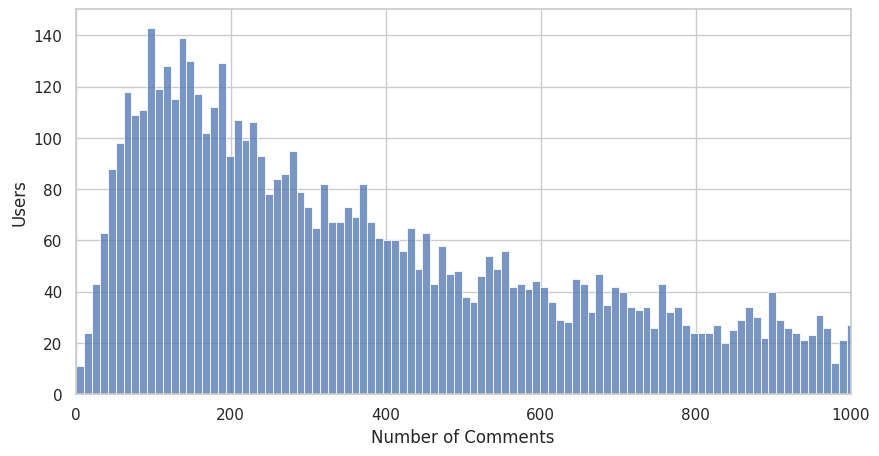

In [ ]:
print(len(posts.get('users')))
print(len(posts.get('posts_text')))
print((min(posts.get('posts_num'))))
print(len((posts.get('max_len'))))
plt.figure(figsize=(10,5))
plt.xlim(0,1000)
plt.xlabel('Number of Comments')
plt.ylabel('Users')
sns.histplot(posts.get('posts_num'),bins=10000,kde=False)
plt.show()